Быстрая сортировка

In [13]:
def quick_sort(nums, left, right):
    def partition(left, right):
        middle = nums[(left + right) // 2]
        forward, backward = left, right
        while forward <= backward:
            while(nums[forward] < middle): forward += 1
            while(nums[backward] > middle): backward -= 1
            if forward <= backward:
                nums[forward], nums[backward] = nums[backward], nums[forward]
                forward += 1
                backward -= 1
        return forward, backward

    # РАЗДЕЛЯЙ: Разбиение массива
    # относительно опорного элемента
    i, j = partition(left, right)
    # ВЛАСТВУЙ: Рекурсивная сортировка
    if left < j:
        quick_sort(nums, left, j) # Левая часть
    if i < right:
        quick_sort(nums, i, right) # Правая часть

    # ОБЪЕДИНЯЙ: Не требуется
    # массив сортируется на месте

In [16]:
def sortq(nums):
    quick_sort(nums, 0, len(nums) - 1)

In [17]:
nums = [3,6,2,8,1,9,5,2,4,7,7,1,8]
sortq(nums)
nums


[1, 1, 2, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9]

In [20]:
def check(nums):
    for a, b in zip(nums[:-1], nums[1:]):
        if  a > b: return False
    return True

In [22]:
import numpy as np
x = np.random.uniform(0, 100, 1000)

In [24]:
%%time
sortq(x)

CPU times: user 5.49 ms, sys: 0 ns, total: 5.49 ms
Wall time: 6.09 ms


In [25]:
check(x)

True

In [26]:
x = np.random.uniform(0, 100, 1000)

In [27]:
%%time
x.sort()

CPU times: user 767 µs, sys: 0 ns, total: 767 µs
Wall time: 3.66 ms


Бинарный поиск

In [63]:
def binary_search(nums, left, right, target):
    # Базовый случай: элемент не найден
    if left > right:
        return -1
    # РАЗДЕЛЯЙ: Находим средний элемент
    mid = (right + left) // 2
    # ВЛАСТВУЙ: Рекурсивно ищем в соответствующей половине
    if nums[mid] == target:
        return mid  # Элемент найден
    elif nums[mid] > target:
        # Ищем в левой половине
        return binary_search(nums, left, mid - 1, target)
    else:
        # Ищем в правой половине
        return binary_search(nums, mid + 1, right, target)
    # ОБЪЕДИНЯЙ: Не требуется - возвращаем готовый результат


In [64]:
def binary_search_iterative(nums, target):
    left = 0
    right = len(nums) - 1

    while left <= right:
        mid = (right + left) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] > target:
            right = mid - 1
        else:
            left = mid + 1
    return -1


In [82]:
x = np.random.randint(0, 10000, 100000)
x.sort()
x

array([   0,    0,    0, ..., 9999, 9999, 9999])

In [85]:
%%time
binary_search(x, 0, len(x) - 1, 434)

CPU times: user 24 µs, sys: 3 µs, total: 27 µs
Wall time: 28.4 µs


4307

In [87]:
%%time
binary_search_iterative(x, 434)

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 27.7 µs


4307

Ближайшие точки

In [155]:
'''struct Point {
    double x, y;
};'''
def distance(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

def brute_force_closest(points, left, right):
    res = float('inf'), -1, -1
    for i in range(left, right):
        for j in range(i + 1, right + 1):
            d = distance(points[i], points[j])
            if d < res[0]:
                res = d, points[i], points[j]
    return res

def strip_closest(strip, d):
    minDist = d, -1, -1
    for i in range(len(strip)):
        for j in range(i + 1, len(strip)):
            if strip[j][1] - strip[i][1] > minDist[0]:
                break
            dist = distance(strip[i], strip[j])
            if dist < minDist[0]:
                minDist = dist, strip[i], strip[j]
    return minDist

def closest_points(points, left, right):
        n = right - left + 1
        if n <= 3:
            return brute_force_closest(points, left, right)

        mid = (right + left) // 2
        midX = points[mid][0]

        dLeft = closest_points(points, left, mid)
        dRight = closest_points(points, mid + 1, right)
        if dLeft[0] < dRight[0]:
            d = dLeft
        else: d = dRight

        # Полоса
        strip = []
        for i in range(left, right + 1):
            if abs(points[i][0] - midX) < d[0]:
                strip.append(points[i])

        strip.sort(key=lambda x:x[1])
        dStrip = strip_closest(strip, d[0])
        if dStrip[0] < d[0]:
            return dStrip
        return d


In [161]:
import numpy as np
n = 100
shown = min(10 ,n)
points_np = np.random.uniform(0, 10, 2 * n)
points_np = points_np.reshape((n, 2))
points = list(points_np)
points_np.T[:, :shown]

array([[3.73562283, 0.81252108, 0.57046537, 4.17217263, 1.49899247,
        0.46893233, 3.38241347, 2.01313139, 1.17020541, 3.47333418],
       [1.72308675, 3.55749196, 3.1279064 , 8.14968314, 0.0720065 ,
        8.83937485, 8.09983621, 1.69875973, 8.79566665, 2.34991677]])

In [163]:
points[:shown]

[array([3.73562283, 1.72308675]),
 array([0.81252108, 3.55749196]),
 array([0.57046537, 3.1279064 ]),
 array([4.17217263, 8.14968314]),
 array([1.49899247, 0.0720065 ]),
 array([0.46893233, 8.83937485]),
 array([3.38241347, 8.09983621]),
 array([2.01313139, 1.69875973]),
 array([1.17020541, 8.79566665]),
 array([3.47333418, 2.34991677])]

In [164]:
points.sort(key=lambda x:x[0])
points[:shown]

[array([0.12574928, 6.76914839]),
 array([0.27669529, 3.08580661]),
 array([0.30479805, 5.63207868]),
 array([0.46893233, 8.83937485]),
 array([0.57046537, 3.1279064 ]),
 array([0.81252108, 3.55749196]),
 array([1.03113351, 2.06036814]),
 array([1.17020541, 8.79566665]),
 array([1.20521587, 2.87944975]),
 array([1.26619302, 5.25957672])]

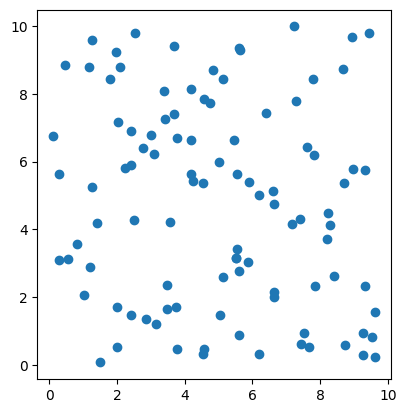

In [165]:
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.scatter(points_np.T[0], points_np.T[1])
ax.set_aspect('equal')


In [166]:
res1 = closest_points(points, 0, len(points) - 1)
res1

(np.float64(0.018772346575004255),
 array([5.5174515 , 3.16584073]),
 array([5.52784223, 3.15020636]))

In [167]:
brute_force_closest(points, 0, len(points) - 1)

(np.float64(0.018772346575004255),
 array([5.5174515 , 3.16584073]),
 array([5.52784223, 3.15020636]))

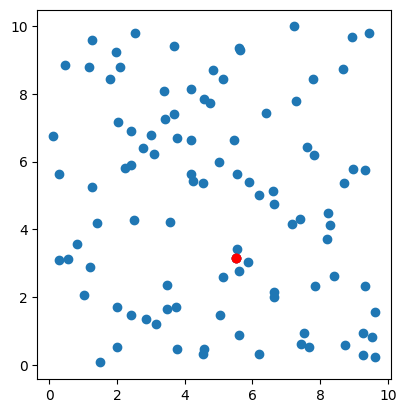

In [168]:
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.scatter(points_np.T[0], points_np.T[1])
ax.plot(res1[1][0], res1[1][1], 'ro')
ax.plot(res1[2][0], res1[2][1], 'ro')
ax.set_aspect('equal')